# PyTorch Computer Vision

## The objective is to develop a model for multiclass classification and evaluate its capabilities using a Convolutional Neural Network.

Computer vision libraries in PyTorch
- `torchvision` base domain library for PyTorch computer vision
- `torchvision.datasets`
- `torchvision.models` for pretrained Computer Vision models
- `torchvision.transforms` for manipulating computer vision data
- `torch.utils.data.Dataset` base dataset for PyTorch
- `torch.utils.data.DataLoader` creates a PyThon iterable over a dataset

In [2]:
# Import PyTorch
import torch
import torch.nn as nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Set device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device:{device}")

Device:cpu


### Getting the dataset FashionMNIST
- Black and white images of clothes
- 10 classification labels

Data split into training and testing data:
Training data size:60000
Testing data size:10000

Classification Labels and Index:
0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot

Image shape:
torch.Size([1, 28, 28]) -> [color channels, height, width]
Image label:Ankle boot


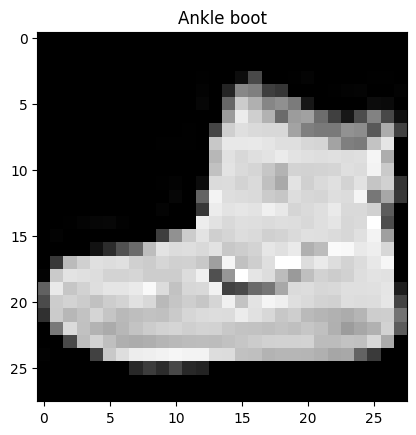

In [3]:
# Setup training data
import torchvision
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root="data", # dir to store data
    train=True, # training split
    download=True, # do we want to download?
    transform=ToTensor(), # convert to tensors
    target_transform=None # transfer the labels
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False, # only get testing data
    download=True,
    transform=ToTensor()
)

print("Data split into training and testing data:")
print(f"Training data size:{len(train_data.data)}")
print(f"Testing data size:{len(test_data.data)}\n")

# Use classes attribute to get labels
class_names = train_data.classes

print('Classification Labels and Index:')
for idx, class_name in enumerate(class_names):
    print(idx, class_name)
    
# See the first data point from training set
image, label = train_data[0]
print(f"\nImage shape:\n{image.shape} -> [color channels, height, width]")
print(f"Image label:{class_names[label]}")

# Visualizing the first data point
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.show()

### Prepare DataLoader
- DataLoader turns data into Python iterable.
- Specifically, we want to turn data into batches as images take a lot of data and longer to train.
- Also, batches are used to break it down into smaller sizes when trained per epoch.

In [4]:
# Turn train dataset into DataLoader
from torch.utils.data import DataLoader

# Setup batch_size hyperparameter
BATCH_SIZE=32

train_dataloader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

test_dataloader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=True)

print(f"Train Data | Length:{len(train_dataloader)} | Batches {BATCH_SIZE}")
print(f"Test Data | Length:{len(test_dataloader)} | Batches {BATCH_SIZE}")

Train Data | Length:1875 | Batches 32
Test Data | Length:313 | Batches 32


### Building a Convolutional Neural Network
- CNNs can find patterns in visual data.
- Input layer -> [Convolutional layer -> activation layer -> pooling layer] -> Output layer

### Architecture for the CNN model to be built
1. Convolution Layer #1
   - Input/Hidden: convolution applied followed by ReLU activation for non-linearity
   - Hidden/Hidden: convolution applied followed by ReLU activaton followed by max pooling for highest value
   
2. Convolution Layer#2
   - Hidden/Hidden: convolution appplied followed by ReLU activation for non-linearity
   - Hidden/Hidden: convolution applied followed by ReLU activation  followed by max pooling for highest value


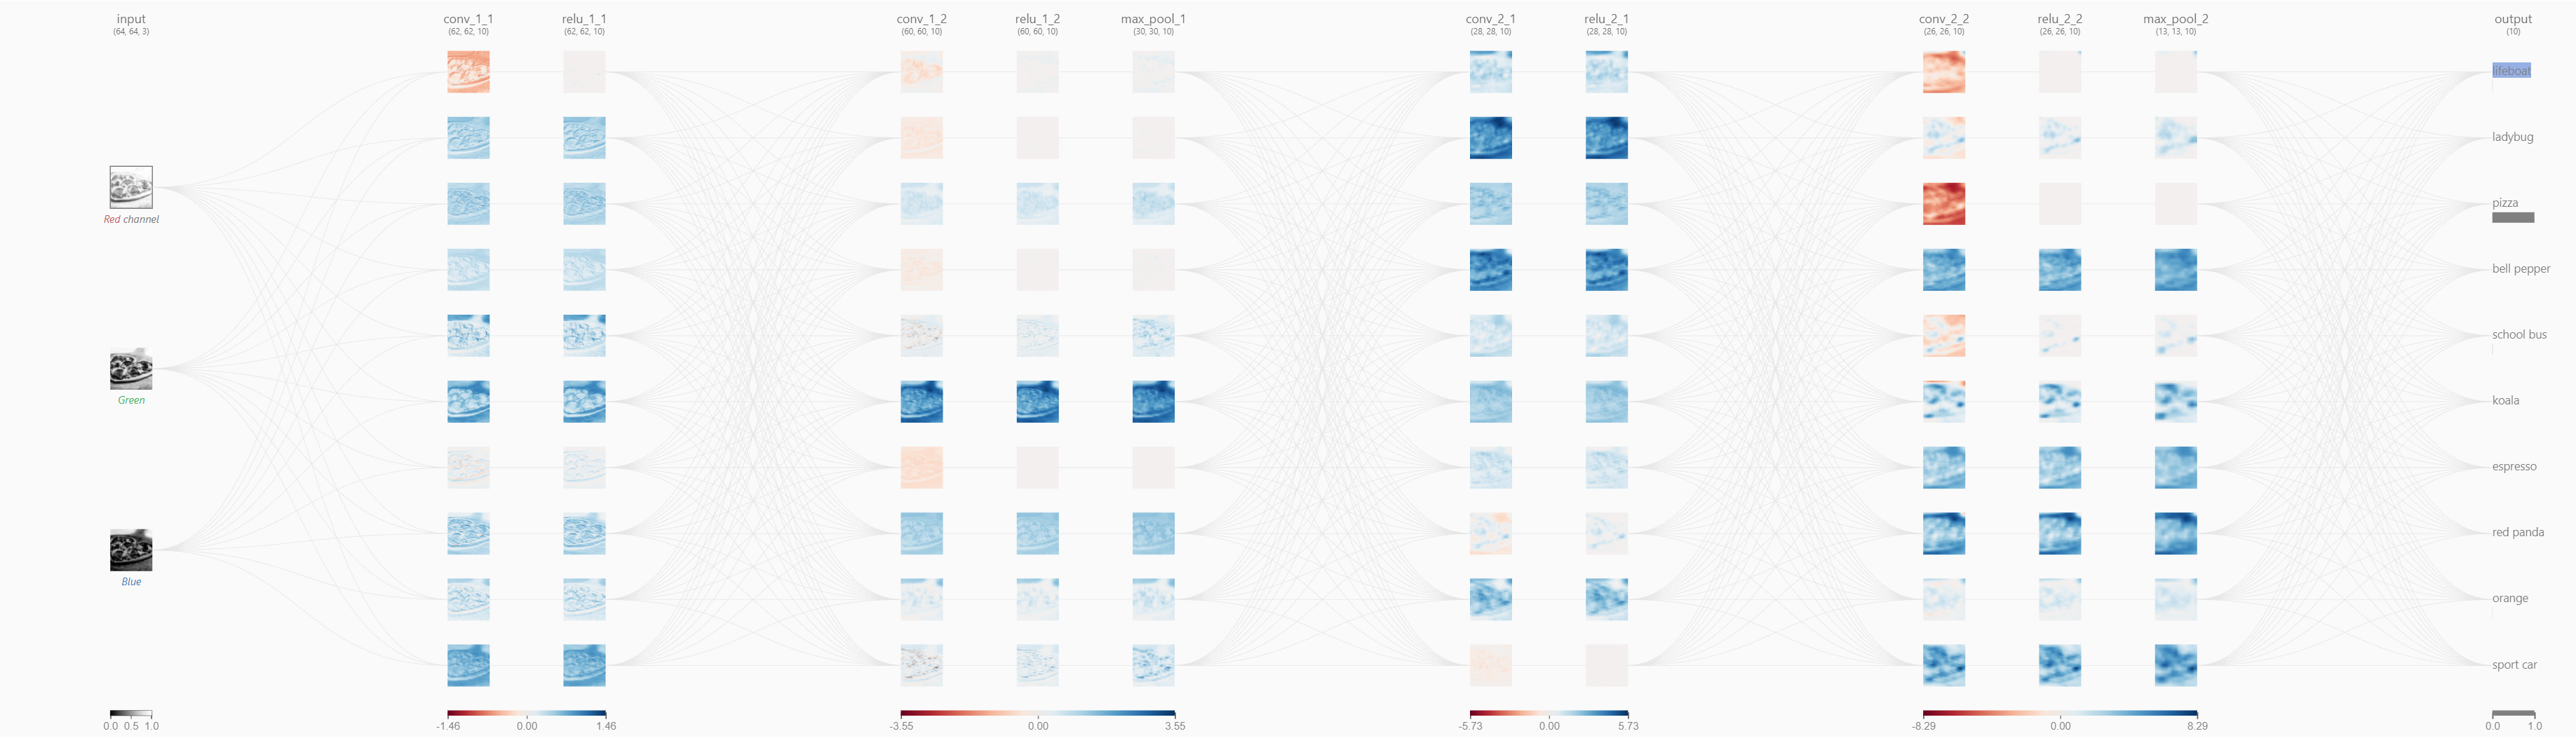

In [5]:
# Creating the CNN above
class FashionMNISTModel_CNN(nn.Module):
    
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        
        # Convolutional block #1
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels = input_shape, out_channels = hidden_units, kernel_size=(3,3), stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size=(3,3), stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2))
        
        # Convolutional block #2
        self.conv_block_2 =nn.Sequential(
            nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size=(3,3), stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size=(3,3), stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2))
        
        # Classifier layer
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, out_features=output_shape))
        
    def forward(self, x: torch.Tensor):
        x = self. conv_block_1(x)
        #print(f"Output shape of convolutional block #1: {x.shape}")
        x = self.conv_block_2(x)
        #print(f"Output shape of convolutional block #2: {x.shape}")
        x = self.classifier(x)
        #print(f"Output shape of classifier: {x.shape}")
        return x
    
# Set seed for consistency
torch.manual_seed(42)

# Instantiate the CNN class 
model = FashionMNISTModel_CNN(input_shape=1, # number of color channels in the image
                                hidden_units=10,
                                output_shape=len(class_names))

### Use an individual image to test the model

In [6]:
# Get one batch from the training dataloader
images, labels = next(iter(train_dataloader))
print(f"Batch Shape:{images.shape}")

# Get the first image and label
test_image = images[0]
test_label = labels[0]

print(f"Actual label: {test_label}, Predicted Class: {class_names[test_label]}")

print(f"Test image shape: {test_image.shape}")

Batch Shape:torch.Size([32, 1, 28, 28])
Actual label: 9, Predicted Class: Ankle boot
Test image shape: torch.Size([1, 28, 28])


### Understanding what happens in `nn.Conv2D` & `nn.MaxPool2d`

In [7]:
# Original image
print(f"Shape for test image: {test_image.shape}")

# Set seed for consistency
torch.manual_seed(42)

### 1. CONVOLUTIONS
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=1, out_channels=10, kernel_size=(3, 3), stride=1, padding=0)

# Pass the data through the convolutional layer
conv_output = conv_layer(test_image)

# Shape of image 
print(f"Shape of image after going through convolution layer: {conv_output.shape}")


### 2. MAX POOLING
# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(conv_output)

print(f"Shape after going through conv_layer() and max_pool_layer: {test_image_through_conv_and_max_pool.shape}")

Shape for test image: torch.Size([1, 28, 28])
Shape of image after going through convolution layer: torch.Size([10, 26, 26])
Shape after going through conv_layer() and max_pool_layer: torch.Size([10, 13, 13])


### Test the model

In [8]:
### TESTING MODE
model.eval()

# Add batch dimension since model expects it
X_test = test_image.unsqueeze(dim=0)
print(f"Shape after batch dimension added: {X_test.shape}")

## Clear gradients
with torch.inference_mode():
    # Predictions on test set
    y_test_logits = model(X_test)
    y_test_probs = torch.softmax(y_test_logits, dim=1)
    y_test_labels = torch.argmax(y_test_probs, dim=1)
    print(f"Predicted label: {y_test_labels}, Predicted Class: {class_names[y_test_labels]}")


Shape after batch dimension added: torch.Size([1, 1, 28, 28])
Predicted label: tensor([2]), Predicted Class: Pullover


### Setup functions to be used by the model
* Loss Function - since working with multiclass classification, use `nn.CrossEntropyLoss`
* Optimizer will be `SGD`
* Metric will be accuracy function as this is for a classification

In [9]:
import torch.optim as optim

# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

# Loss function for multiclass classification
loss_fn = nn.CrossEntropyLoss()

# SGD for optimizer
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

### Create both training and testing loops

In [10]:
# Import tqdm for progress bar
from tqdm import tqdm

# Set the seed
torch.manual_seed(42)

# Set the number of epochs
epochs = 3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    # Reset training loss for each epoch
    train_loss = 0
    # Add a loop to loop through training batches
    for X, y in train_dataloader:
        model.train() 
        # 1. Forward pass to get logits for train_data inputs
        y_pred = model(X)

        # 2. Calculate loss per batch
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch 

        # 3. Zero the gradients after each batch
        optimizer.zero_grad()

        # 4. Backpropagation to find gradient of loss with each parameter
        loss.backward()

        # 5. Update parameters to lower loss
        optimizer.step()

    # Divide total train loss by length of train dataloader to get average loss per batch for every epoch
    train_loss /= len(train_dataloader)
    
    ### TESTING MODE
    test_loss, test_acc = 0, 0 
    model.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1. Forward pass
            test_pred = model(X)
           
            # 2. Calculate loss (accumulatively)
            test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
        
        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader to get average loss per batch for every epoch
        test_acc /= len(test_dataloader)

    ## Print out what's happening for every epoch
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------


 33%|███▎      | 1/3 [00:13<00:27, 13.51s/it]


Train loss: 0.60013 | Test loss: 0.40263, Test acc: 85.38%

Epoch: 1
-------


 67%|██████▋   | 2/3 [00:26<00:13, 13.47s/it]


Train loss: 0.36154 | Test loss: 0.38275, Test acc: 86.45%

Epoch: 2
-------


100%|██████████| 3/3 [00:40<00:00, 13.46s/it]


Train loss: 0.32599 | Test loss: 0.34758, Test acc: 87.55%



### Let's get the predictions and actual labels for the images from the test set

In [13]:
def get_pred_and_true_class_names(model ,test_data, class_names):
    # Create lists for predicted and actual class names
    pred_class_names=[]
    true_class_names=[]
    
    # Set model to evaluation mode
    model.eval()
    with torch.inference_mode():
        for index in range(len(test_data)):
            image, actual_label = test_data[index]
            
            # Add batch dimension as first for N,C,H,W
            image = torch.unsqueeze(image, dim=0)
            # Get logits
            pred_logit = model(image)
            # Get probabilities for logits dimension
            pred_prob = torch.softmax(pred_logit, dim=1)
            # Get labels for probabilities dimension
            pred_label = torch.argmax(pred_prob, dim=1)
            
            # Add to test predictions list
            pred_class_name = class_names[pred_label]
            pred_class_names.append(pred_class_name)
            
            # Add to test actual list
            true_class_name = class_names[actual_label]
            true_class_names.append(true_class_name)
            
    return true_class_names, pred_class_names

# Call on function 
true_class_names = get_pred_and_true_class_names(model ,test_data, class_names)[0]
pred_class_names = get_pred_and_true_class_names(model ,test_data, class_names)[1]
    

### To visualize, the predictions for classification, let's use a Confusion Matrix for both on the train and test sets.

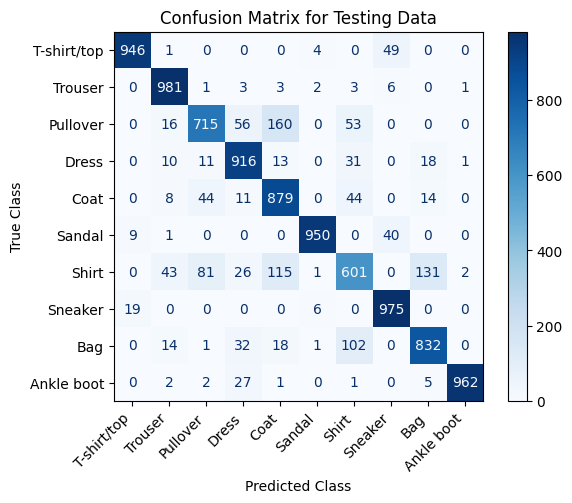

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, num_classes, title):
    """
    Plots a confusion matrix using sklearn's ConfusionMatrixDisplay.

    Args:
        y_true (array-like): True labels (ground truth).
        y_pred (array-like): Predicted labels.
        num_classes (int): Number of classes in the classification task.
        title (str): Title for the confusion matrix plot. Default is "Confusion Matrix".

    Returns:
        None: Displays the confusion matrix plot.
    """
    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues)
    
     # Rotate x-axis tick labels and align to the right
    plt.setp(disp.ax_.get_xticklabels(), rotation=45, ha="right")

    # Label the axes and set the title
    plt.xlabel("Predicted Class")
    plt.ylabel("True Class")
    plt.title(f"Confusion Matrix for {title}")

    # Show the plot
    plt.show()
    
out_dim=len(class_names)

# Testing data
plot_confusion_matrix(true_class_names, pred_class_names, out_dim, "Testing Data")